In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

## classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Random Forest Classification¶

In [2]:
def random_forest_classification(train_X, train_y, test_X, test_y):
    model = RandomForestClassifier(n_estimators = 100,random_state = 1)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    print("score: ", model.score(train_X, train_y))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))

## Decision Tree Classification

In [3]:
def decision_tree_classification(train_X, train_y, test_X, test_y):
    model = DecisionTreeClassifier()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    print("score: ", model.score(train_X, train_y))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))

## Gaussian Naive Bayes¶

In [4]:
def gaussian_naive_bayes(train_X, train_y, test_X, test_y):
    model = GaussianNB()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    print("score: ", model.score(train_X, train_y))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))

## Support Vector Machine

In [5]:
def support_vector_machine(train_X, train_y, test_X, test_y):
    model = SVC(random_state = 1)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    print("score: ", model.score(train_X, train_y))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))

## Logistic regression

In [6]:
def logistic_regression(train_X, train_y, test_X, test_y):
    model = LogisticRegression()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    print("score: ", model.score(train_X, train_y))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))

## Linear Regression

In [7]:
def linear_regression(train_X, train_y, test_X, test_y):
    model = LinearRegression()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)
    
    print("r_square score: ", r2_score(test_y, predict))
    print("r_square score (train dataset): ", r2_score(train_y, train_predict))

## Random Forest

In [8]:
def random_forest(train_X, train_y, test_X, test_y):
    model = RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    print("r_square score: ", r2_score(test_y, predict))
    print("r_square score (train dataset): ", r2_score(train_y, train_predict))

## Decision Tree

In [9]:
def decision_tree(train_X, train_y, test_X, test_y):
    model = DecisionTreeRegressor(random_state = 42)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    print("r_square score: ", r2_score(test_y, predict))
    print("r_square score (train dataset): ", r2_score(train_y, train_predict))

## Reading Data

In [10]:
raw_data = pd.read_csv("./Admission_Predict_Ver1.1.csv")

In [11]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Rename Column

In [12]:
raw_data.set_index('Serial No.', inplace=True)
raw_data.index.name = "No"

In [13]:
raw_data = raw_data.rename(columns = {'Chance of Admit ': 'Chance', \
                                      'GRE Score': 'GRE', \
                                      'TOEFL Score': 'TOEFL', \
                                      'University Rating': 'Rating', \
                                     })
raw_data.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
No,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Correlation Plot

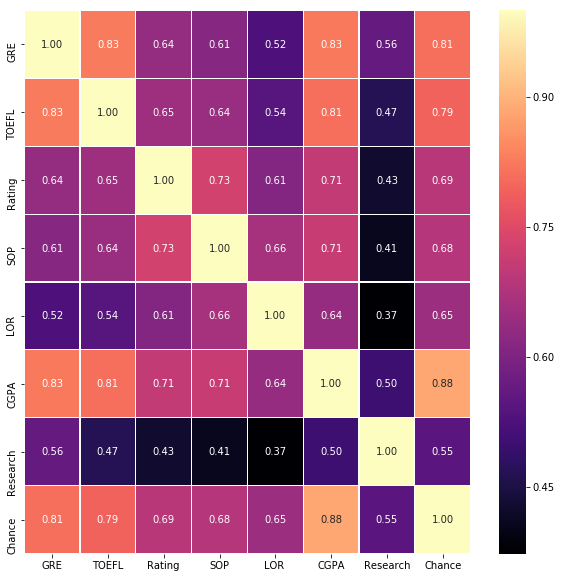

In [14]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(raw_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## Split Data to Training and Testing

In [15]:
y = raw_data["Chance"].values
X = raw_data.drop(["Chance"],axis=1)

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Scaling Data

In [17]:
scaler_X = MinMaxScaler(feature_range = (0, 1))
train_scale_X = scaler_X.fit_transform(train_X.copy())
test_scale_X = scaler_X.transform(test_X.copy())

## Start Regression Modeling

In [18]:
linear_regression(train_scale_X, train_y, test_scale_X, test_y)

r_square score:  0.818843256782963
r_square score (train dataset):  0.8210671369321554


In [19]:
random_forest(train_scale_X, train_y, test_scale_X, test_y)

r_square score:  0.7907314767726159
r_square score (train dataset):  0.9682217215509897


In [20]:
decision_tree(train_scale_X, train_y, test_scale_X, test_y)

r_square score:  0.57799511002445
r_square score (train dataset):  1.0


## Start Classification Modeling
#### If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
#### If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [26]:
train_status_y = [1 if possibility > 0.8 else 0 for possibility in train_y]
test_status_y  = [1 if possibility > 0.8 else 0 for possibility in test_y]

train_status_y = np.array(train_status_y)
test_status_y = np.array(test_status_y)

#### Note about score: It is the mean accuracy for test data and labels.
#### Note about precision: precision = TP / (TP + FP)
#### Note about recall: recall = TP / (TP + FN)
#### Note about F1: F1 = 2 / ((1/precision)+(1/recall))

In [28]:
logistic_regression(train_scale_X, train_status_y, test_scale_X, test_status_y)

score:  0.9275
precision_score:  0.96
recall_score:  0.8888888888888888
f1_score:  0.923076923076923


In [29]:
support_vector_machine(train_scale_X, train_status_y, test_scale_X, test_status_y)

score:  0.925
precision_score:  0.9615384615384616
recall_score:  0.9259259259259259
f1_score:  0.9433962264150944


In [30]:
gaussian_naive_bayes(train_scale_X, train_status_y, test_scale_X, test_status_y)

score:  0.91
precision_score:  0.7941176470588235
recall_score:  1.0
f1_score:  0.8852459016393442


In [31]:
decision_tree_classification(train_scale_X, train_status_y, test_scale_X, test_status_y)

score:  1.0
precision_score:  0.8666666666666667
recall_score:  0.9629629629629629
f1_score:  0.912280701754386


In [32]:
random_forest_classification(train_scale_X, train_status_y, test_scale_X, test_status_y)

score:  1.0
precision_score:  0.8928571428571429
recall_score:  0.9259259259259259
f1_score:  0.9090909090909091
